# class 8 More Regression/Classification

- [8.1 Other Classifiers](#8.1-Other-Classifiers)
    - [8.1.1 K Nearest Neighbors](#8.1.1-K-Nearest-Neighbors)
    - [8.1.1.1 Handwritten Digits](#8.1.1.1-Handwritten-Digits)
    - [8.1.2 Multinomial Logistic Regression](#8.1.2-Multinomial-Logistic-Regression)
    - [8.1.3 ROC Curves](#8.1.3-ROC-Curves)
- [8.2 Regularized Regression](#8.2-Regularized-Regression)
    - [8.2.0 Variable Selection](#8.2.0-Variable-Selection)
    - [8.2.1 L2 Regression](#8.2.1-L2-Regression)
    - [8.2.2 L1 Regression](#8.2.2-L1-Regression)
    - [8.2.3 ElasticNet](#8.2.3-Elastic-Net)
- [8.3 kaggle](#8.3-kaggle)
    - [8.3.1 Housing Data](#8.3.1-Housing-Data)
    - [8.3.2 Your first submission](#8.3.2-Your-first-submission)


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import axes3d
#import seaborn as sns

#import sklearn.linear_model as skl_lm
#from sklearn.metrics import mean_squared_error, r2_score
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

#from scipy import stats
#from scipy import special

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

%precision 3

'%.3f'

----------------------------------------------------------
### 8.1 Other Classifiers

##### 8.1.1 K Nearest Neighbors

![KNN](figures/irisDataCampKNN.png)

In [2]:
iris = datasets.load_iris()
knn = KNeighborsClassifier(n_neighbors=6)
# knn.fit(iris['data'], iris['target'])

Task: Split the iris data into training and test. Predict on test

In [3]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size = 0.3, random_state=42)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train) # kd tree 

# Print the accuracy
print(knn.score(X_test, y_test))

1.0


Simple Idea, no modeling assumptions at all !!
Think about the following:

- What is "the model", i.e. what needs to be stored ? (coefficients, functions, ...)
- What is the model complexity ?
- Does this only work for classification ? What would be the regression analogy ?
- What improvements could we make to the simple idea ?
- In the modeling world:
    * linear ?
    * local vs. global
    * memory/CPU requirements
    * wide versus tall data ?


###### 8.1.1.1 Handwritten Digits

In [4]:
# model is a formular or a graph (linear regression) 
# knn store the enitire data set > knn carry the dataset (huge bagpack)
# local

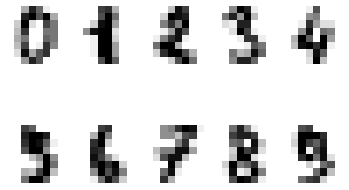

In [5]:
digits = datasets.load_digits()
import matplotlib.pyplot as plt

#how can I improve the plots ? (i..e no margins, box around plot...)
plt.figure(1)

for i in np.arange(10)+1:
    plt.subplot(2, 5, i)
    plt.axis('off')
    #plt.gray() 
    #plt.matshow(digits.images[i-1]) 
    plt.imshow(digits.images[i-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show() 


In [6]:

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy 
print(knn.score(X_test, y_test))



0.9833333333333333


Big Confusion Matrix

In [7]:
preds = knn.predict(X_test)

pd.crosstab(preds,y_test)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,36,0,0,0,0,0,0,0,0,0
1,0,36,0,0,0,0,0,0,2,0
2,0,0,35,0,0,0,0,0,0,0
3,0,0,0,37,0,0,0,0,0,0
4,0,0,0,0,36,0,0,0,0,1
5,0,0,0,0,0,37,0,0,0,0
6,0,0,0,0,0,0,35,0,0,0
7,0,0,0,0,0,0,0,36,1,0
8,0,0,0,0,0,0,1,0,32,1


**Task**

Construct a model complexity curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

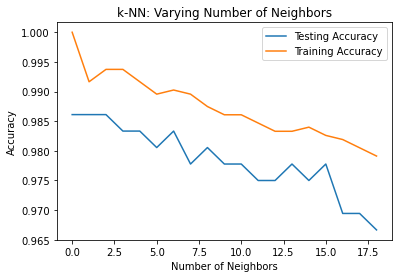

In [8]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(test_accuracy, label = 'Testing Accuracy')
plt.plot(train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

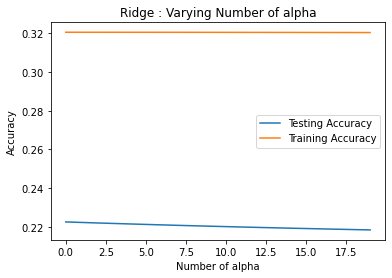

In [16]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LogisticRegression
lambd = np.arange(0.5, 20, 1)
test_accuracy = np.empty(len(lambd))
train_accuracy = np.empty(len(lambd))


for i, k in enumerate(lambd):
    rid = Ridge(k)
    rid.fit(X_train, y_train)
    
    test_accuracy[i] = rid.score(X_test, y_test)
    train_accuracy[i] = rid.score(X_train, y_train)
    
# Generate plot
plt.title('Ridge : Varying Number of alpha')
plt.plot(test_accuracy, label = 'Testing Accuracy')
plt.plot(train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of alpha')

plt.ylabel('Accuracy')
plt.show()

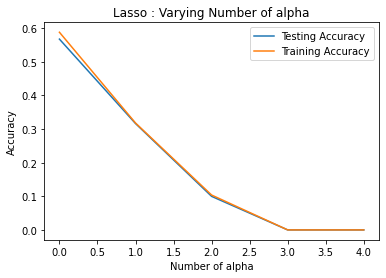

In [31]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LogisticRegression
lambd = np.arange(0.1, 10, 2)
test_accuracy = np.empty(len(lambd))
train_accuracy = np.empty(len(lambd))


for i, k in enumerate(lambd):
    lasso = Lasso(k)
    lasso.fit(X_train, y_train)
    
    test_accuracy[i] = lasso.score(X_test, y_test)
    train_accuracy[i] = lasso.score(X_train, y_train)
    
# Generate plot
plt.title('Lasso : Varying Number of alpha')
plt.plot(test_accuracy, label = 'Testing Accuracy')
plt.plot(train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of alpha')
plt.ylabel('Accuracy')
plt.show()

#### 8.1.2 Multinomial Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
iris = datasets.load_iris()

log_reg = LogisticRegression(multi_class='multinomial',solver='sag', max_iter=100, random_state=42)
log_reg.fit(iris["data"][:,3:],iris["target"])
    
preds = log_reg.predict_proba(iris["data"][:,3:])

preds[1:5,:]
#log_reg = LogReg()

array([[9.259e-01, 7.396e-02, 1.788e-04],
       [9.259e-01, 7.396e-02, 1.788e-04],
       [9.259e-01, 7.396e-02, 1.788e-04],
       [9.259e-01, 7.396e-02, 1.788e-04]])

**Task**: Compute a confusion matrix


In [44]:
# just target
# iris["data"][:,3:]
pd.crosstab(preds,y_test)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,36,0,0,0,0,0,0,0,0,0
1,0,36,0,0,0,0,0,0,2,0
2,0,0,35,0,0,0,0,0,0,0
3,0,0,0,37,0,0,0,0,0,0
4,0,0,0,0,36,0,0,0,0,1
5,0,0,0,0,0,37,0,0,0,0
6,0,0,0,0,0,0,35,0,0,0
7,0,0,0,0,0,0,0,36,1,0
8,0,0,0,0,0,0,1,0,32,1


In [43]:
preds.shape

(360,)

**Further Reading and Explorations:**
* Read about "one versus all" pitted against multinomial. Check out this [notebook](plot_logistic_multinomial.ipynb).
* Read about [marginal probabilities](http://data.princeton.edu/wws509/stata/mlogit.html).

#### 8.1.3 ROC Curves

Simplest to go back to 2 labels from lesson 7:

In [14]:
iris = datasets.load_iris()
X = iris["data"][:,3:]
y = (iris["target"]==2).astype(np.int)
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

y_pred = log_reg.predict_proba(X_test) 
y_pred_prob = y_pred[:,1]

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred_prob > 0.25 ))
print(confusion_matrix(y_test, y_pred_prob > 0.5 ))
print(confusion_matrix(y_test, y_pred_prob > 0.75 ))

[[24  8]
 [ 0 13]]
[[32  0]
 [ 0 13]]
[[32  0]
 [ 4  9]]


In [23]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
X[:10]

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1]])

#### The need for more sophisticated metrics than accuracy and single thresholding

This is particularly relevant for imbalanced classes, example: Emails

- Spam classification
    * 99% of emails are real; 1% of emails are spam
- Could build a classifier that predicts ALL emails as real
    * 99% accurate!
    * But horrible at actually classifying spam
    * Fails at its original purpose
 
 ![ConfusionMatrix](figures/DataCampConfusionMatrix.png)
 
 ![ISLR-Table4.7](figures/ISLR-Table4.7.png)

 
 **Metrics from CM**
 
- Precision: $$\frac{TP}{TP+FP}$$
- Recall: $$\frac{TP}{TP+FN}$$
- F1 score: 
$$2 \cdot \frac{precision \cdot recall}{precision + recall}$$
The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. ()
- High precision: Not many real emails predicted as spam
- High recall: Predicted most spam emails correctly
 

In [ ]:
#Example:



In [ ]:
print(classification_report(y_test, y_pred_prob > 0.5 ))

But we still need to fix a threshold for any of the metrics above to work !

Wouldn't it be best to communicate the prediction quality over a wide range (all!) of thresholds and enable the user to choose the most suitable one for his/her application !
That is the idea of the **Receiver Operating Characteristic (ROC)** curve!

![ROC](figures/DataCampROCexample.png)

In [11]:
#The pima-indians- diabetes data:
#  https://www.kaggle.com/uciml/pima-indians-diabetes-database#diabetes.csv

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("data/diabetes.csv", header=None, names=col_names,skiprows=[0])
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

log_reg = KNeighborsClassifier(5)
log_reg.fit(X_train,y_train)

y_pred = log_reg.predict_proba(X_test) 
y_pred_prob = y_pred[:,1]

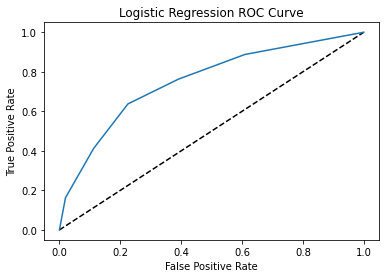

In [29]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

##### Area under the ROC curve (AUC)

In [23]:
from sklearn.metrics import roc_auc_score

# overall performance of a cliassfier summarized over all possible threshild, is given by the are under the roc curve
# auc score take into account all possible threshold
# ideal top left corener
roc_auc_score(y_test, y_pred_prob)

0.752317880794702

##### AUC using cross-validation

In [24]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(log_reg, X, y, cv=10, scoring='roc_auc')

print(cv_scores)

[0.716 0.753 0.684 0.639 0.77  0.781 0.786 0.863 0.78  0.767]


------------------------------------------------
### 8.2 Regularized Regression

We will illustrate the concepts on the Boston housing data set that we are familiar with from lesson 6

In [9]:
boston = pd.read_csv('data/boston.csv')
#print(boston.head())
X = boston.drop('medv', axis=1).values
y = boston['medv'].values

#### 8.2.0 Variable Selection

[ISLR slides on model selection](../slides/model_selection.pdf)

####  8.2.1 L2 Regression

Recall: Linear regression minimizes a loss function
- It chooses a coefficient for each feature variable
- Large coefficients can lead to overfi"ing
- Penalizing large coefficients: Regularization

##### Detour: $L_p$ norms

http://mathworld.wolfram.com/VectorNorm.html

Our new penalty term in finding the coefficients $\beta_j$ is the minimization

$$
\sum_{i=1}^n{\left( y_i - \beta_0 - \sum_{j=1}^p{\beta_j x_{ij}} \right)^2} + \lambda \sum_{j=1}^p{\beta_j^2} = RSS + \lambda \sum_{j=1}^p{\beta_j^2}
$$

Instead of obtaining **one** set of coefficients we have a dependency of $\beta_j$  on $\lambda$:

![Ridge Coefficients](figures/RidgeCoefficients1.png)

In [10]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)
# normalize = True x are standarize
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
# R²
ridge.score(X_test, y_test)


0.6996938275127315

####  8.2.2 L1 Regression

Our penalty termy looks slightly different (with big consequences for **sparsity**)

$$
\sum_{i=1}^n{\left( y_i - \beta_0 - \sum_{j=1}^p{\beta_j x_{ij}} \right)^2} + \lambda \sum_{j=1}^p{| \beta_j |} = RSS + \lambda \sum_{j=1}^p{| \beta_j |}
$$

![Lasso Coefficients](figures/LassoCoefficients1.png)

(Comment: *LASSO* = "least absolute shrinkage and selection operator")

In [11]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.595022953532855

In [13]:
lasso.coef_

array([-0.   ,  0.   , -0.   ,  0.   , -0.   ,  3.189, -0.   , -0.   ,
       -0.   , -0.   , -0.307,  0.   , -0.487])

**Feature Selection Property of the LASSO**

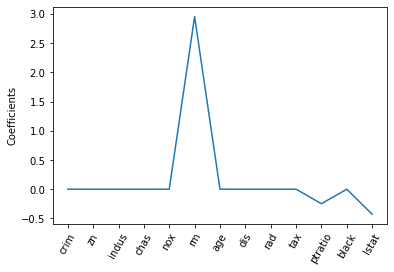

In [17]:
names = boston.drop('medv', axis=1).columns
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

##### Tuning the shrinkage parameter with CV

(to come, still working on it)

#### 8.2.3 ElasticNet

###### The mystery of the additional $\alpha$ paramater 

* The elastic net for correlated variables, which uses a penalty that is part L1, part L2.
* Compromise between the ridge regression penalty $(\alpha = 0)$ and the lasso penalty $(\alpha = 1)$. 
* This penalty is particularly useful in the $p >> N$ situation, or any situation where there are many correlated predictor variables.


$$
 RSS + \lambda \sum_{j=1}^p{ \left( \frac{1}{2} (1-\alpha) \beta_j^2 + \alpha | \beta_j | \right)}
$$
The right hand side can be written as
$$
  \sum_{j=1}^p{ \frac{1}{2} \lambda (1-\alpha) \beta_j^2 + \alpha \lambda | \beta_j |} = \sum_{j=1}^p{  \lambda_R \beta_j^2 +  \lambda_L | \beta_j |}
$$
with the Ridge penalty parameter $\lambda_R \equiv \frac{1}{2} \lambda (1-\alpha)$ and the lasso penalty parameter $\lambda_L \equiv \alpha \lambda$.
So we see that with
$$
\alpha = \frac{\lambda_L}{\lambda_L+ 2 \lambda_R}, \mbox{ and } \lambda= \lambda_L+ 2 \lambda_R
$$

Further Reading:
- this [notebook](plot_lasso_coordinate_descent_path.ipynb) shows how to plot the entire "path" of coefficients.

### 8.3 kaggle
####  8.3.1 Housing Data

    

This [notebook](../data/kaggle/HousePrices/EDA.ipynb) (despite its annoying "humor") is a good start. 

####  8.3.2 Your first submission